# Data Jobs Analysis

## 1. Mục tiêu
 - Tìm hiểu về sự phân bổ mức lương trong lĩnh vực dữ liệu.
 - Quan sát dưới nhiều tiêu chí (vị trí, kinh nghiệm, môi trường làm việc, ...) để nhận định những khác biệt nào tạo nên sự chênh lệch về mức lương giữa các nhân sự làm việc trong lĩnh vực dữ liệu.
 - Kiểm tra đâu là những công việc phổ biến không thể không nhắc đến khi nói về làm việc với dữ liệu.

## 2. Chuẩn bị dữ liệu

### Khai báo thư viện

In [553]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns

### Đọc dữ liệu

In [554]:
data_job = pd.read_csv(r"C:\Users\Anh Huynh\Data Analysis\jobs_in_data_2024.csv")

In [556]:
data_job.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling


### Mô tả dữ liệu
 - **work_year:** Năm mà dữ liệu về công việc được thu thập.
 - **experience_level:** Mức độ kinh nghiệm chuyên môn của nhân viên.
 - **employment_type:** Loại hình việc làm (toàn thời gian, bán thời gian,...).
 - **job_title:** Chức danh cụ thể của công việc.
 - **salary:** Tổng lương hàng năm.
 - **salary_currency:** Đơn vị tiền tệ của mức lương được chi trả cho công việc.
 - **salary_in_usd:** Tổng lương hàng năm khi được quy đổi sang USD.
 - **employee_residence:** Quốc gia nơi nhân viên cư trú.
 - **work_setting:** Môi trường làm việc (từ xa, tại văn phòng,...).
 - **company_location:** Quốc gia sở tại của công ty.
 - **company_size:** Quy mô công ty (nhỏ - S, vừa - M, lớn - L).
 - **job_category:** Phân loại theo vai trò công việc.

## 3. Làm sạch dữ liệu

### Kiểm tra tổng quan

In [557]:
data_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14199 non-null  int64 
 1   experience_level    14199 non-null  object
 2   employment_type     14199 non-null  object
 3   job_title           14199 non-null  object
 4   salary              14199 non-null  int64 
 5   salary_currency     14199 non-null  object
 6   salary_in_usd       14199 non-null  int64 
 7   employee_residence  14199 non-null  object
 8   work_setting        14199 non-null  object
 9   company_location    14199 non-null  object
 10  company_size        14199 non-null  object
 11  job_category        14199 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.3+ MB


### Kiểm tra giá trị thiếu

In [558]:
for c in data_job.columns:
    missing_values = np.mean(data_job[c].isna())
    print(f'{c} - {missing_values * 100}%')

work_year - 0.0%
experience_level - 0.0%
employment_type - 0.0%
job_title - 0.0%
salary - 0.0%
salary_currency - 0.0%
salary_in_usd - 0.0%
employee_residence - 0.0%
work_setting - 0.0%
company_location - 0.0%
company_size - 0.0%
job_category - 0.0%


### Kiểm tra Outliers

In [559]:
data_job.select_dtypes(include= 'int64').describe()

,work_year,salary,salary_in_usd
count,14199.000000,14199.000000,14199.00000
mean,2023.110501,149057.514262,149472.04944
std,0.686929,64932.044143,64379.26016
min,2020.000000,14000.000000,15000.00000
25%,2023.000000,102150.000000,104000.00000
50%,2023.000000,142000.000000,142000.00000
75%,2024.000000,185900.000000,185900.00000
max,2024.000000,450000.000000,450000.00000


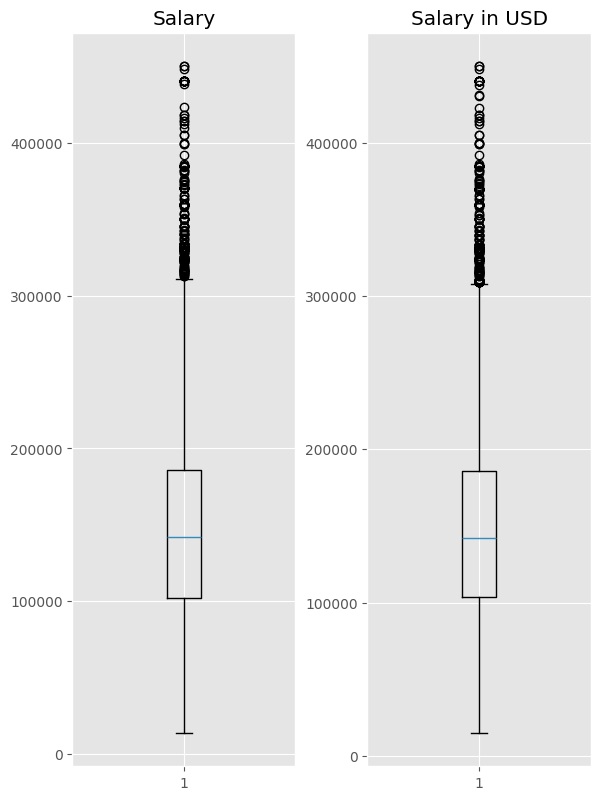

In [560]:
fig, axes = plt.subplots(1, 2, figsize= (6,8) ,sharex= False, sharey= False)

axes[0].boxplot(data_job.salary)
axes[0].set_title('Salary')
axes[1].boxplot(data_job.salary_in_usd)
axes[1].set_title('Salary in USD')

fig.tight_layout(pad= 0.7)
plt.show()

In [561]:
data_job.sort_values(by= 'salary_in_usd', ascending= False).head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
3362,2024,Senior,Full-time,Research Engineer,450000,USD,450000,United States,In-person,United States,M,Data Science and Research
14001,2020,Mid-level,Full-time,Research Scientist,450000,USD,450000,United States,In-person,United States,M,Data Science and Research
1911,2024,Executive,Full-time,Head of Machine Learning,448000,USD,448000,United States,Remote,United States,M,Machine Learning and AI
3406,2024,Senior,Full-time,Research Scientist,440000,USD,440000,United States,In-person,United States,M,Data Science and Research
3281,2024,Senior,Full-time,Research Engineer,440000,USD,440000,United States,In-person,United States,M,Data Science and Research


### Chuyển đổi kiểu dữ liệu
**experience_level**, **company_size** sẽ được chuyển sang kiểu dữ liệu phân loại có thứ bậc.\
**employment_type**, **work_setting**, **job_category** sẽ được chuyển sang kiểu dữ liệu phân loại không thứ bậc.

In [562]:
#Kiểm tra các loại giá trị trong từng cột
for col in data_job[['experience_level', 'employment_type', 'work_setting', 'company_size', 'job_category']]:
    print(f'{col}:\n{data_job[col].unique()}', end='\n\n')

experience_level:
['Entry-level' 'Executive' 'Senior' 'Mid-level']

employment_type:
['Freelance' 'Full-time' 'Contract' 'Part-time']

work_setting:
['Remote' 'In-person' 'Hybrid']

company_size:
['M' 'S' 'L']

job_category:
['Data Science and Research' 'BI and Visualization'
 'Data Architecture and Modeling' 'Data Analysis' 'Data Engineering'
 'Leadership and Management' 'Data Quality and Operations'
 'Machine Learning and AI' 'Cloud and Database'
 'Data Management and Strategy']



In [563]:
#Tạo kiểu phân loại
exp_level = CategoricalDtype(['Entry-level', 'Mid-level', 'Senior', 'Executive'], ordered= True)
co_size = CategoricalDtype(['S', 'M', 'L'], ordered= True)

In [564]:
#Chuyển đổi
data_job.experience_level = data_job.experience_level.astype(exp_level)
data_job.company_size = data_job.company_size.astype(co_size)
data_job[['employment_type', 'work_setting', 'job_category']] = data_job[['employment_type', 'work_setting', 'job_category']].astype('category')

In [565]:
#Kiểm tra lại kiểu dữ liệu
data_job.dtypes

work_year                int64
experience_level      category
employment_type       category
job_title               object
salary                   int64
salary_currency         object
salary_in_usd            int64
employee_residence      object
work_setting          category
company_location        object
company_size          category
job_category          category
dtype: object

## 4. Khám phá dữ liệu

### Ma trận tương quan
Chuyển những dữ liệu kiểu category thành dạng số sẽ thuận tiện hơn cho việc tính ma trận tương quan.

In [566]:
numerized_df = data_job.select_dtypes(include= ['int64', 'category'])
for col in numerized_df:
    if numerized_df[col].dtype == 'category':
        numerized_df[col] = numerized_df[col].cat.codes

numerized_df.corr()

,work_year,experience_level,employment_type,salary,salary_in_usd,work_setting,company_size,job_category
work_year,1.000000,-0.053803,0.027719,0.073915,0.077343,-0.114610,-0.103814,0.006903
experience_level,-0.053803,1.000000,0.005473,0.371744,0.372450,0.074851,-0.022330,0.122590
employment_type,0.027719,0.005473,1.000000,0.014143,0.013142,-0.027710,0.026899,-0.007401
salary,0.073915,0.371744,0.014143,1.000000,0.993838,-0.012376,0.024600,0.307989
salary_in_usd,0.077343,0.372450,0.013142,0.993838,1.000000,-0.014158,0.019560,0.308389
work_setting,-0.114610,0.074851,-0.027710,-0.012376,-0.014158,1.000000,-0.085053,-0.044237
company_size,-0.103814,-0.022330,0.026899,0.024600,0.019560,-0.085053,1.000000,-0.013564
job_category,0.006903,0.122590,-0.007401,0.307989,0.308389,-0.044237,-0.013564,1.000000


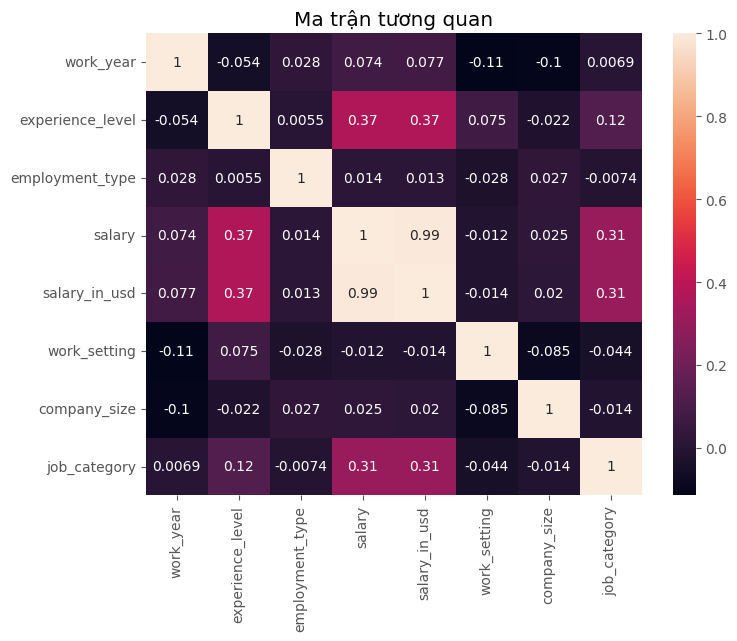

In [285]:
plt.figure(figsize= (8,6))
sns.heatmap(numerized_df.corr(), annot= True)
plt.title('Ma trận tương quan')
plt.show()

### Kiểm tra sự phân bố, giá trị trung bình của tiền lương

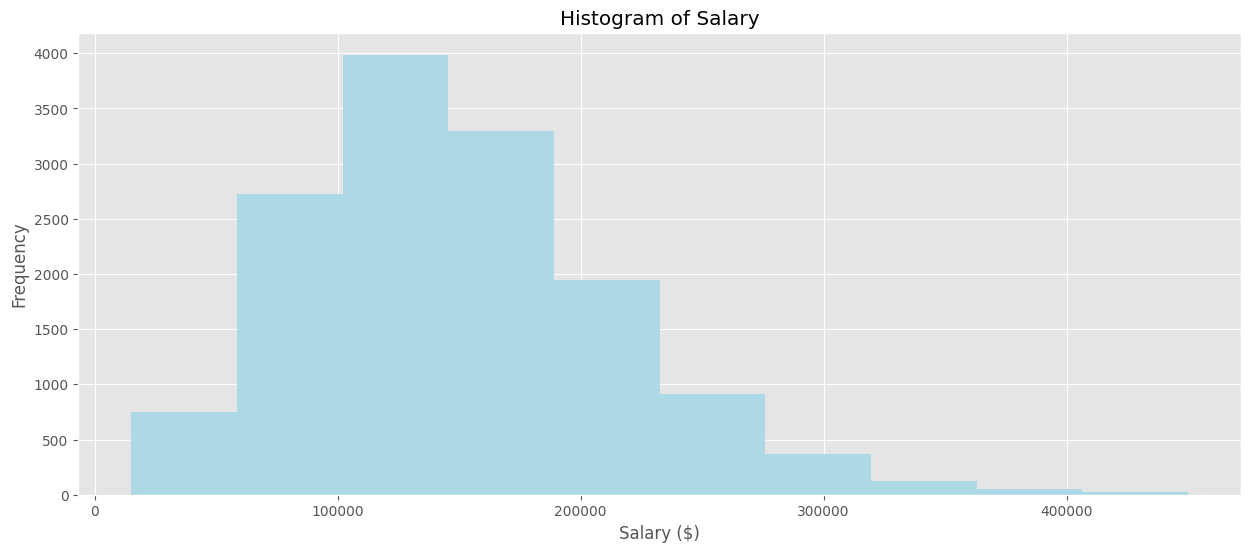

In [570]:
data_job.salary_in_usd.plot(kind= 'hist',figsize= (15,6), color= 'lightblue')
plt.xlabel('Salary ($)')
plt.title('Histogram of Salary')
plt.show()

> Tiền lương trong lĩnh vực dữ liệu phổ biến rơi vào khoảng \\$100,000 - \\$200,000/năm.

In [571]:
#Trung bình lương theo năm
avg_salary = data_job.groupby('work_year').salary_in_usd.mean().round()
avg_salary

work_year
2020    105879.0
2021    106484.0
2022    135421.0
2023    153617.0
2024    149306.0
Name: salary_in_usd, dtype: float64

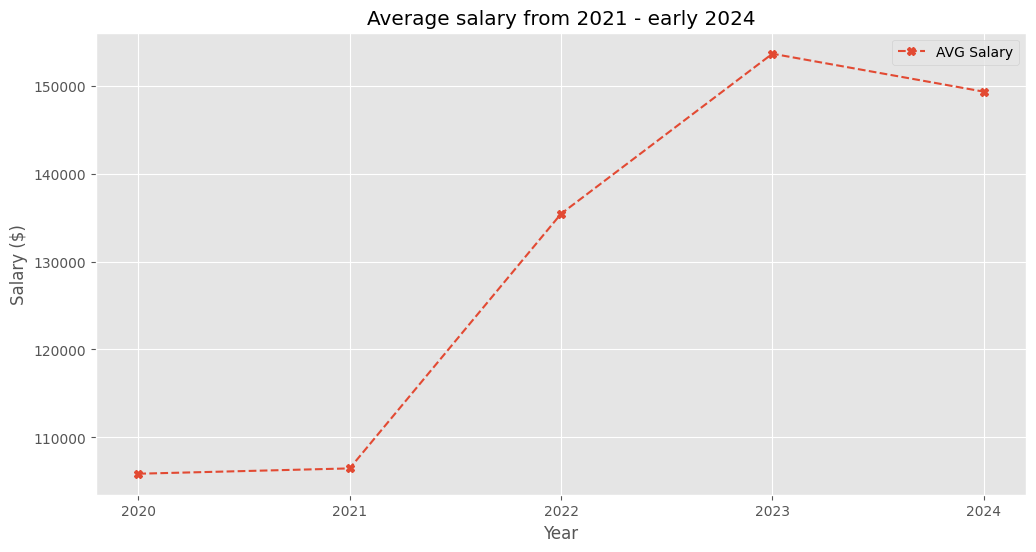

In [577]:
avg_salary.plot(figsize= (12,6), linestyle = 'dashed', label= 'AVG Salary', marker= 'X')
plt.xlabel('Year')
plt.ylabel('Salary ($)')
plt.title('Average salary from 2021 - early 2024')
plt.xticks(avg_salary.index)
plt.legend()

plt.show()

> Lương trung bình trong lĩnh vực dữ liệu tính từ năm 2020 đến đầu năm 2024 có chiều hướng tăng và đặc biệt tăng mạnh từ sau năm 2021.

### Xem xét sự chênh lệch mức lương theo các tiêu chí: kinh nghiệm, loại hình và môi trường làm việc, quy mô công ty

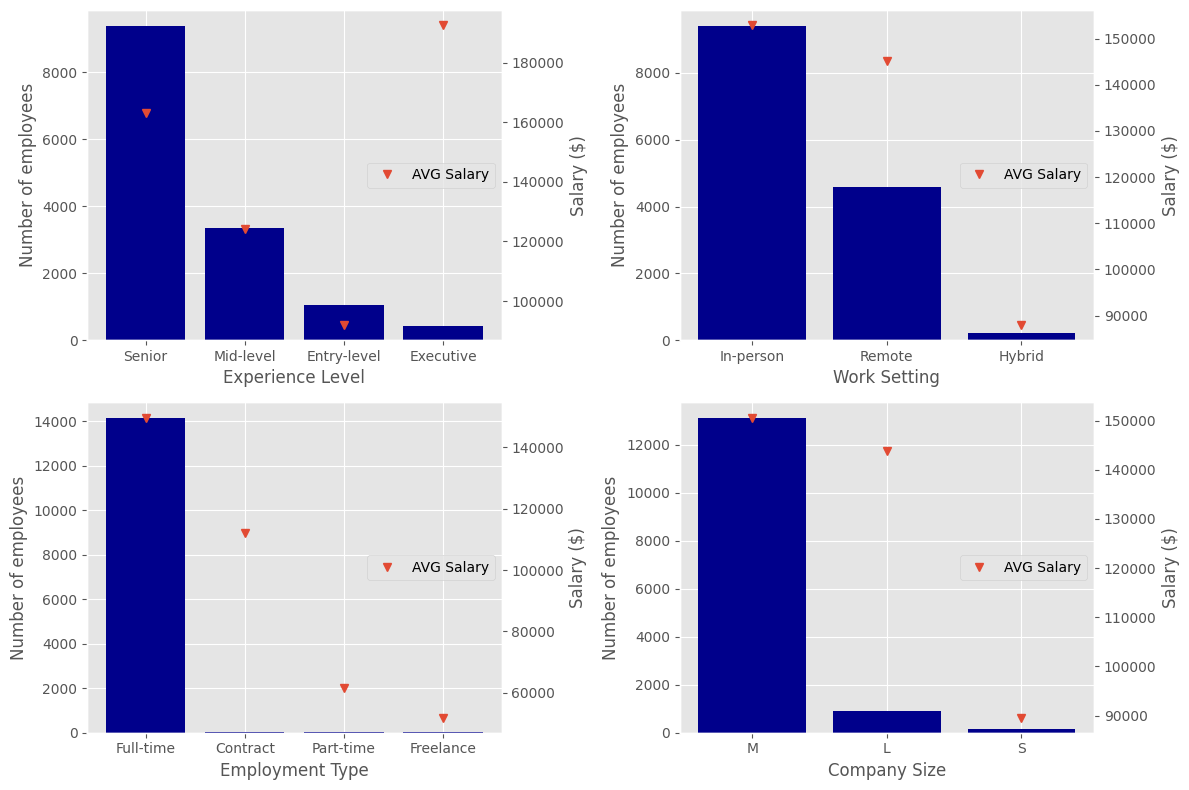

In [657]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))
category_col = ['experience_level', 'work_setting', 'employment_type', 'company_size']
p = 0

for row in ax:
    for col in row:
        col.bar(data_job[category_col[p]].value_counts().index, data_job[category_col[p]].value_counts().values, color= 'darkblue')
        col.set_xlabel(category_col[p].replace('_', ' ').title())
        col.set_ylabel('Number of employees')
        
        col2= col.twinx()
        col2.plot(data_job.groupby(category_col[p], observed= True).salary_in_usd.mean(), label= 'AVG Salary', linestyle= 'None', marker= 'v')
        col2.set_ylabel('Salary ($)')
        p+= 1
        plt.grid()
        plt.legend(loc= 'center right')

plt.tight_layout()
plt.show()

> - Lương trong ngành dữ liệu có sự cách biệt giữa các cấp độ kinh nghiệm. Nhân viên càng có nhiều kinh nghiệm thì mức lương sẽ càng tăng, trung bình mức chênh lệch này khoảng \\$30,000.
> - Những nhân viên làm việc tại văn phòng (in-person) và toàn thời gian (full-time) vẫn đang chiếm ưu thế và có mức lương cao hơn so với các phương thức làm việc khác.
> - Có sự chênh lệch khá lớn giữa mức lương của nhân viên làm việc tại các công ty nhỏ so với công ty vừa và lớn. Tuy nhiên, giữa công ty lớn và vừa thì mức lương của nhân viên không có sự chênh lệch quá khác biệt.

### So sánh mức lương giữa các nhóm công việc trong lĩnh vực dữ liệu

In [595]:
salary_describe = pd.DataFrame()
for cat in data_job.job_category.unique():
    cat_salary = data_job[data_job.job_category == cat].salary_in_usd.describe()
    salary_describe = pd.concat([salary_describe, cat_salary.to_frame(name= cat)], axis= 1)

In [596]:
salary_describe

,Data Science and Research,BI and Visualization,Data Architecture and Modeling,Data Analysis,Data Engineering,Leadership and Management,Data Quality and Operations,Machine Learning and AI,Cloud and Database,Data Management and Strategy
count,4675.000000,600.000000,419.000000,2204.000000,3157.000000,791.000000,79.000000,2148.000000,11.000000,115.000000
mean,162471.364064,125803.150000,156159.405728,106742.485027,146720.425721,142644.457649,96294.367089,181873.419926,142818.181818,93533.686957
std,65746.488580,49676.933412,57852.387051,42847.895463,56918.501331,60501.012806,50493.693941,68763.164574,36912.115374,38794.643769
min,16000.000000,15000.000000,39245.000000,15000.000000,17598.000000,20000.000000,23753.000000,15000.000000,82000.000000,41750.000000
25%,120000.000000,83759.750000,113900.000000,75065.000000,106500.000000,103135.500000,64990.000000,140000.000000,110500.000000,69642.500000
50%,156400.000000,118100.000000,150000.000000,100947.500000,140000.000000,134000.000000,82000.000000,180000.000000,146125.000000,85000.000000
75%,200000.000000,165600.000000,187435.000000,133075.000000,180000.000000,172775.000000,115950.000000,222101.250000,170187.500000,110000.000000
max,450000.000000,263000.000000,381500.000000,430967.000000,385000.000000,430640.000000,289120.000000,448000.000000,190000.000000,250000.000000


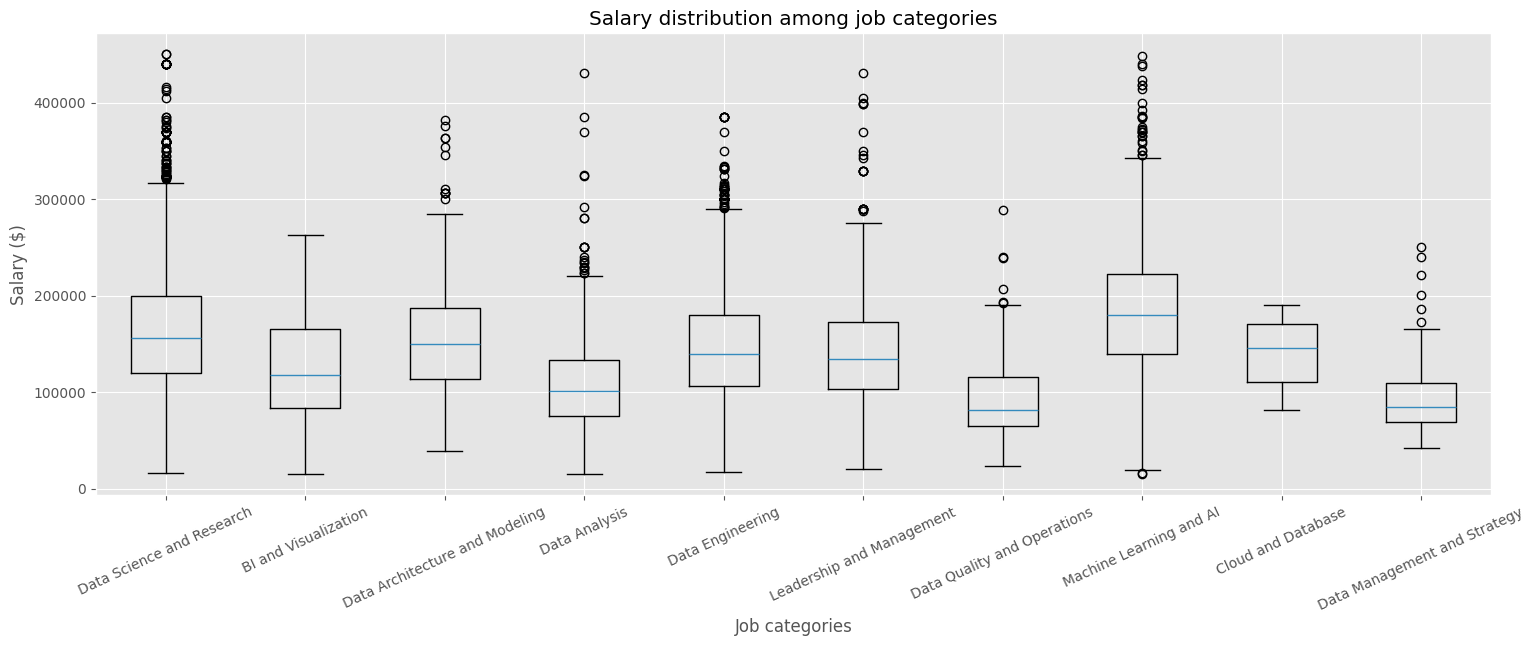

In [660]:
plt.figure(figsize= (18, 6))
plt.boxplot([data_job[data_job.job_category == cat].salary_in_usd for cat in data_job.job_category.unique()], labels= [cat for cat in data_job.job_category.unique()])
plt.tick_params(axis= 'x', rotation= 25)
plt.xlabel('Job categories')
plt.ylabel('Salary ($)')
plt.title('Salary distribution among job categories')

plt.show()

> - Nhóm công việc về *Machine Learning and AI* và *Data Science and Research* có khoảng phân bổ mức lương rộng hơn so với các nhóm khác, đồng nghĩa với việc sự phát triển của một nhân sự trong 2 nhóm việc này sẽ mang lại thu nhập hấp dẫn hơn.
> - 2 nhóm việc về *Data Quality and Operations* và *Data Management and Strategy* dường như có mức thu nhập hạn chế hơn so với các nhóm khác.
> - Làm việc về *Cloud and Database* có mức thu nhập khởi đầu cao hơn nhưng sự tăng tiến về tiền lương lại có phần khiêm tốn.

### Những vị trí có mức lương cao nhất

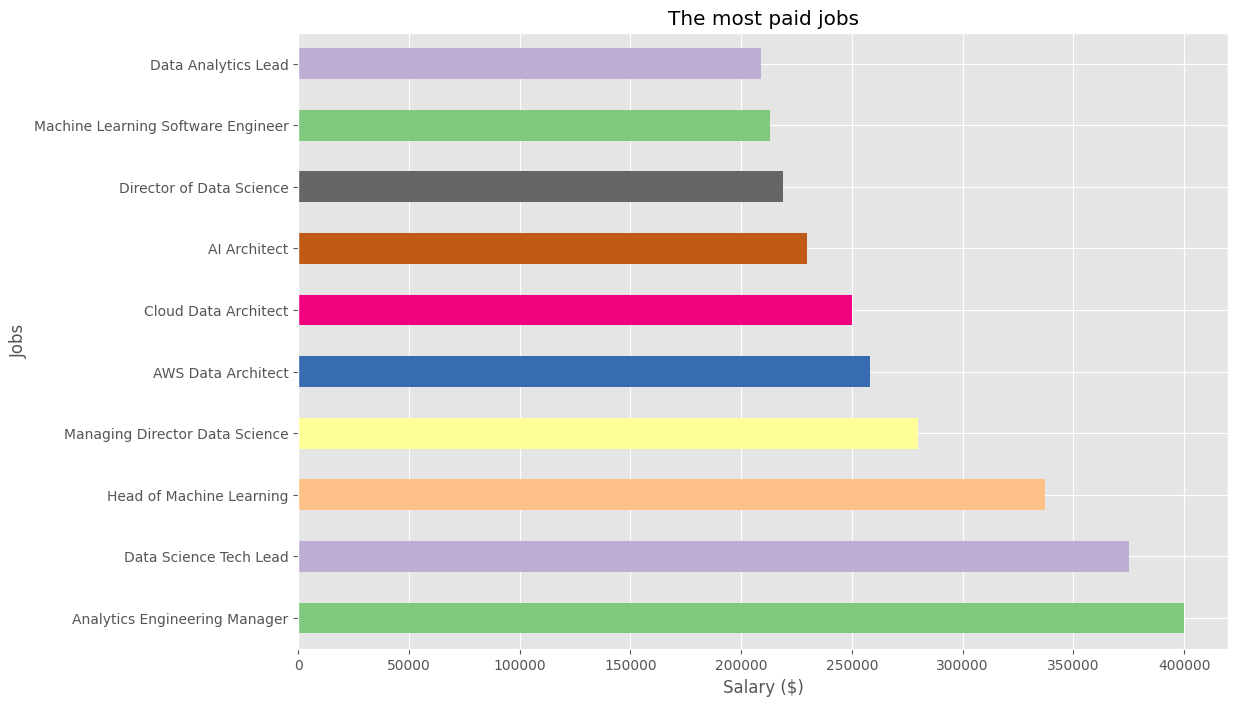

In [623]:
top_salary = data_job.groupby('job_title').salary_in_usd.mean().sort_values(ascending= False).head(10)
top_salary.plot(kind= 'barh', color= sns.color_palette('Accent'), figsize=(12,8))
plt.xlabel('Salary ($)')
plt.ylabel('Jobs')
plt.title('The most paid jobs')
plt.show()

In [653]:
top_job = ['Analytics Engineering Manager', 'Data Science Tech Lead', 'Head of Machine Learning']
for j in top_job:
    print(f'{j} - {set(data_job[data_job.job_title == j].job_category.values.tolist())}')

Analytics Engineering Manager - {'Leadership and Management'}
Data Science Tech Lead - {'Data Science and Research'}
Head of Machine Learning - {'Machine Learning and AI'}


> Dẫn đầu với tổng lương hàng năm từ \\$300,000 - \\$400,000 là các vị trí: *Analytics Engineering Manager, Data Science Tech Lead, Head of Machine Learning.* Các vị trí này lần lượt nằm trong các nhóm công việc về *Leadership and Management, Data Science and Research* và *Machine Learning and AI.*

### Những nhóm công việc và chức danh phổ biến trong lĩnh vực dữ liệu

In [605]:
#Top nhóm công việc phổ biến
popular_category = data_job.pivot_table(values= 'job_title', columns= 'work_year', index= 'job_category', aggfunc= 'count', margins= True, observed= True).sort_values(by= 'All', ascending= False)
popular_category = popular_category.drop(columns= 'All', index= 'All').head().fillna(0)
popular_category_salary = data_job[data_job.job_category.isin(popular_category.index)].groupby('job_category', observed= True).salary_in_usd.mean().round()


#Top công việc phổ biến
popular_job = data_job.pivot_table(values= 'job_category', columns= 'work_year', index= 'job_title', aggfunc= 'count', margins= True, observed= True).sort_values(by= 'All', ascending= False)
popular_job = popular_job.drop(columns= 'All', index= 'All').head().fillna(0)
popular_job_salary = data_job[data_job.job_title.isin(popular_job.index)].groupby('job_title', observed= True).salary_in_usd.mean().round()

In [606]:
#Nhóm công việc phổ biến và trung bình tiền lương
pd.concat([popular_category, popular_category_salary.to_frame('AVG salary')], axis= 1)

,2020,2021,2022,2023,2024,AVG salary
job_category,,,,,,
Data Science and Research,29.0,72.0,500.0,2754.0,1320.0,162471.0
Data Engineering,17.0,45.0,499.0,1891.0,705.0,146720.0
Data Analysis,15.0,28.0,290.0,1301.0,570.0,106742.0
Machine Learning and AI,10.0,37.0,186.0,1346.0,569.0,181873.0
Leadership and Management,0.0,9.0,80.0,464.0,238.0,142644.0


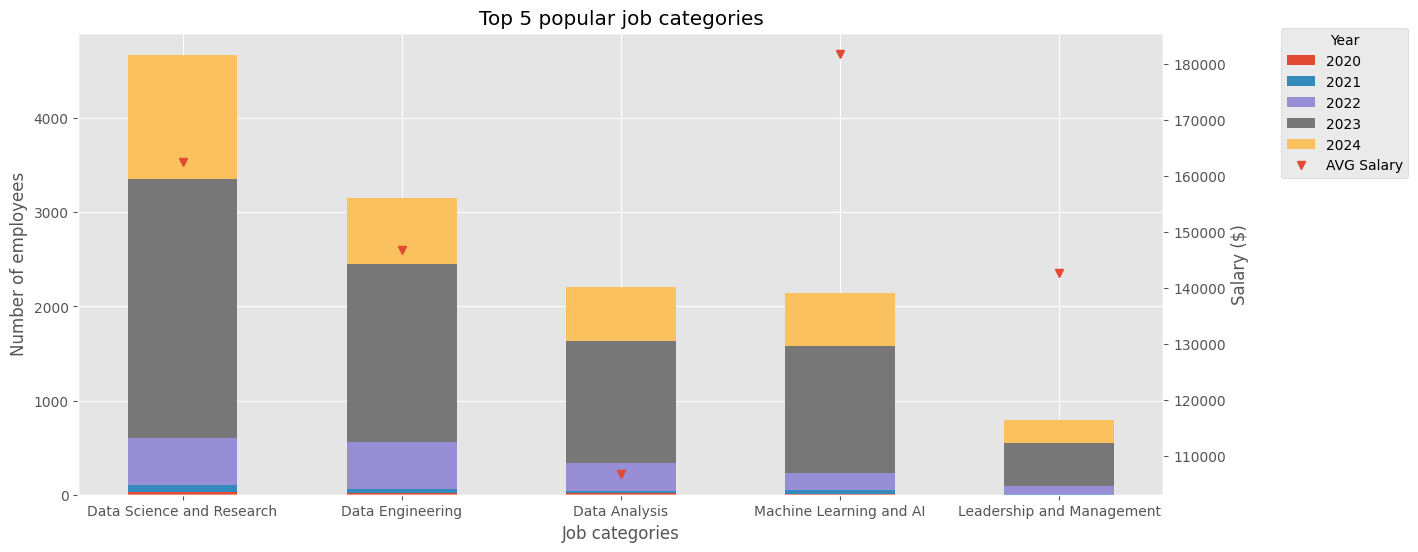

In [658]:
fig, ax= plt.subplots(figsize= (14,6))
bottom= np.zeros(5)
width= 0.5

for y in popular_category.transpose().index:
    ax.bar(popular_category.transpose().columns, popular_category.transpose().loc[y], label= y, width= width, bottom= bottom)
    bottom+= popular_category.transpose().loc[y]
ax.set_xlabel('Job categories')
ax.set_ylabel('Number of employees')

ax2= ax.twinx()
ax2.plot(popular_category_salary, linestyle= 'None', marker= 'v', label= 'AVG Salary')
ax2.set_ylabel('Salary ($)')

plt.title('Top 5 popular job categories')
fig.legend(title= 'Year', bbox_to_anchor= (1.08,0.9))
plt.grid()
plt.show()

> - Sự tăng trưởng về lượng nhân sự qua các năm biểu hiện cho sự mở rộng, phát triển của lĩnh vực dữ liệu.
> - Nhân sự trong lĩnh vực dữ liệu tập trung nhiều vào các nhóm việc về *Data Science and Research* và *Data Engineering*.
> - Trong top 5 nhóm việc phổ biến trong lĩnh vực dữ liệu, nhóm việc về *Machine Learning and AI* tuy không đứng đầu về số lượng nhưng lại dẫn đầu về trung bình tiền lương, phần nào cho thấy được sự ưu ái của các doanh nghiệp dành cho nhân sự làm việc về Học máy và Trí tuệ nhân tạo. 

In [620]:
#Chức danh phổ biến và trung bình tiền lương
pd.concat([popular_job, popular_job_salary.to_frame('AVG salary')], axis= 1)

,2020,2021,2022,2023,2024,AVG salary
job_title,,,,,,
Data Engineer,11.0,35.0,487.0,1849.0,677.0,147170.0
Data Scientist,19.0,34.0,398.0,1705.0,754.0,154358.0
Data Analyst,6.0,19.0,272.0,1262.0,561.0,107935.0
Machine Learning Engineer,4.0,16.0,107.0,965.0,396.0,186972.0
Research Scientist,2.0,10.0,15.0,286.0,141.0,189684.0


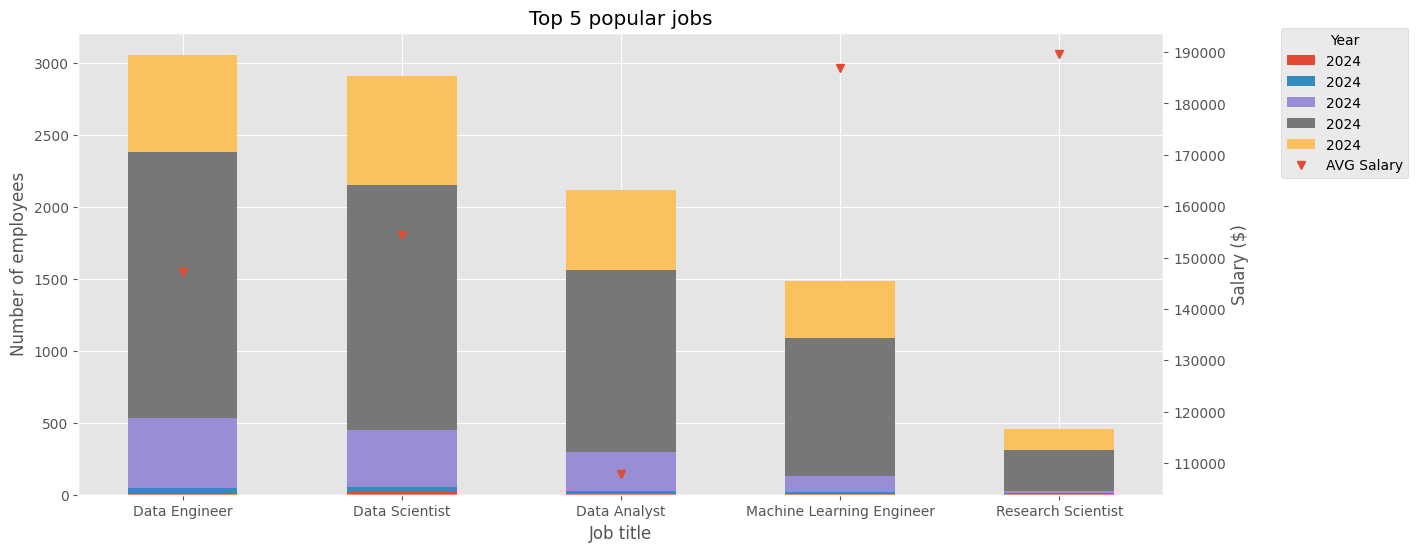

In [661]:
fig, ax = plt.subplots(figsize= (14,6))
bottom= np.zeros(5)
width= 0.5

for y in popular_job.transpose().index:
    ax.bar(popular_job.transpose().columns, popular_job.transpose().loc[y], label= i, width= width, bottom= bottom)
    bottom+= popular_job.transpose().loc[y]
ax.set_xlabel('Job title')
ax.set_ylabel('Number of employees')

ax2= ax.twinx()
ax2.plot(popular_job_salary, linestyle= 'None', marker= 'v', label= 'AVG Salary')
ax2.set_ylabel('Salary ($)')

plt.title('Top 5 popular jobs')
fig.legend(title= 'Year', bbox_to_anchor= (1.08,0.9))
plt.grid()
plt.show()

> *Data Engineer, Data Scientist* và *Data Analyst* là 3 vị trí phổ biến nhất trong lĩnh vực dữ liệu. Trong top 5 vị trí phổ biến, *Machine Learning Engineer* có mức lương khá nổi bật.

### Những nhóm công việc phổ biến cho từng quy mô công ty

In [662]:
cat_co_size = data_job.groupby('company_size', observed= True).job_category.value_counts(normalize= True).unstack('job_category')
cat_co_size

job_category,BI and Visualization,Cloud and Database,Data Analysis,Data Architecture and Modeling,Data Engineering,Data Management and Strategy,Data Quality and Operations,Data Science and Research,Leadership and Management,Machine Learning and AI
company_size,,,,,,,,,,
S,0.005952,0.000000,0.178571,0.000000,0.101190,0.000000,0.000000,0.297619,0.029762,0.386905
M,0.037752,0.000763,0.159777,0.030888,0.229484,0.008389,0.005949,0.318029,0.058115,0.150854
L,0.113166,0.001088,0.085963,0.015234,0.142546,0.005441,0.001088,0.495103,0.026115,0.114255


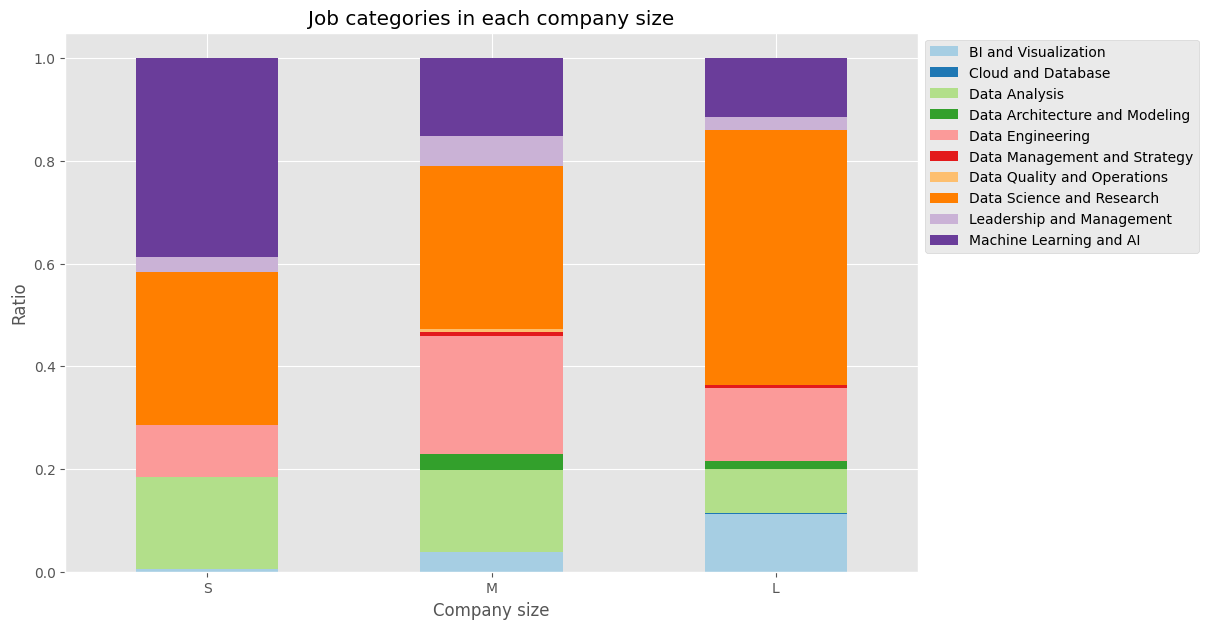

In [673]:
cat_co_size.plot(kind= 'bar', stacked= True, figsize= (11,7), color= sns.color_palette('Paired'))
plt.xlabel('Company size')
plt.ylabel('Ratio')
plt.title('Job categories in each company size')
plt.legend(bbox_to_anchor= (1,1))
plt.tick_params(axis= 'x', rotation= 0)

plt.show()

> - Trong cả 3 nhóm kích cỡ công ty, ta thấy có 4 nhóm việc phổ biến: *Machine Learning and AI, Data Science and Research, Data Engineering, Data Analysis.*
> - Với công ty quy mô nhỏ, nhân sự *Machine Learning and AI* dường như chiếm tỉ lệ nhiều hơn so với các nhóm việc khác trong lĩnh vực dữ liệu. Có khả năng các công ty này cần tập trung nguồn lực cho việc tự động hóa quy trình và tác vụ.
> - Ở các công ty quy mô lớn, *Data Science and Research* lại là nhóm công việc chiếm tỉ trọng cao. Dường như với họ, tận dụng dữ liệu để xây dựng các mô hình dự đoán cho các giá trị tương lai mới là mục tiêu hàng đầu.